In [1]:
import sys
import os
import cv2 as cv

import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern

In [2]:
import numpy as np

In [3]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd()),"modules"))

In [4]:
import NbrRegionSegment as seg


In [5]:
img = cv.imread("../Dataset/" + "Case_3_A13-40883-4236" + ".jpg")
img2 = cv.imread("../Dataset/" + "Case_3_A13-25714-32133" + ".jpg")

In [6]:
# img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)

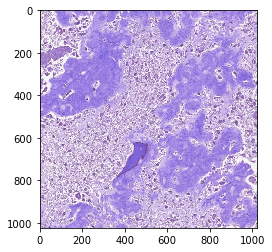

In [7]:
plt.imshow(img)

In [8]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)


In [9]:
#LBP part
radius = 1
points = 8*radius 

lbp = local_binary_pattern(gray_img, points, radius, "uniform").astype("uint8")
lbp2 = local_binary_pattern(gray_img2, points, radius, "uniform").astype("uint8")

print(lbp)

[[3 0 2 ... 4 3 1]
 [4 1 3 ... 5 4 2]
 [4 9 6 ... 5 3 1]
 ...
 [5 1 3 ... 5 5 3]
 [5 1 3 ... 5 5 2]
 [2 1 3 ... 9 1 0]]


In [18]:
# r1, r2 = seg.RegionExtract(img, lbp, 10, 1., 0.30699312, 0.24176985, 1, True)
# r = seg.GetBgMap(r1, 1000, r2, True)
wr, wb, wg, wc = 0.09231725,  0.04552005,  0.7421578, 0.9
thres = 12
r = seg.RemoveBG(img, lbp, thres, 1000, wr, wg, wb, wc)
r2 = seg.RemoveBG(img2, lbp, thres, 1000, wr, wg, wb, wc)

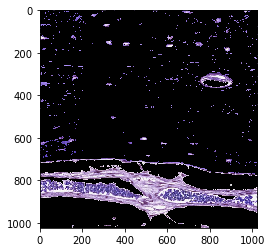

In [19]:
plt.imshow(r2)

In [101]:
r1_rgb = cv.cvtColor(r, cv.COLOR_LAB2BGR)
r1_rgb[r == 0] = 0
r2_rgb = cv.cvtColor(r2, cv.COLOR_LAB2BGR)
r2_rgb[r2 == 0] = 0

In [108]:
cv.imwrite("lab_only.jpg", r)
cv.imwrite("lab_only2.jpg", r2)

True

In [93]:
cv.cvtColor(np.array([[[0, 0, 0]]]), cv.COLOR_LAB2BGR)
# np.array([[[0, 0, 0]]]).shape

error: OpenCV(4.5.1) c:\users\appveyor\appdata\local\temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,-1,-1>,struct cv::impl::A0xe67a8a7a::Set<3,4,-1>,struct cv::impl::A0xe67a8a7a::Set<0,5,-1>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


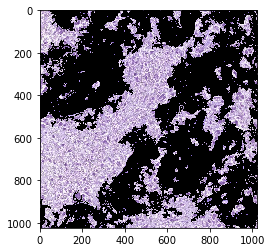

In [73]:
plt.imshow(r)

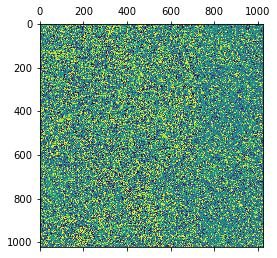

In [58]:
plt.matshow(lbp)

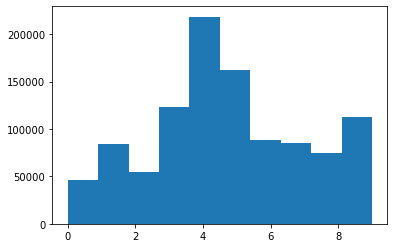

In [59]:
plt.hist(lbp.flatten())
plt.show()

In [16]:
r1 = seg.SegmentImage(cv.cvtColor(img, cv), lbp, 2, 0.2,        1.,         0.54823352, 1.)
# cv.imwrite("col08.jpg", r1)
plt.imshow(r1)

TypeError: Argument 'code' is required to be an integer

In [103]:
r1, r2 = seg.RegionExtract(cv.cvtColor(img, cv.COLOR_BGR2LAB), lbp, 5, 0.2,        1.,         0.54823352, 1.)
a, b = seg.GetAllSegVariance(img, r1, r2.shape[0])

ValueError: Buffer has wrong number of dimensions (expected 2, got 3)

0.8158758319914341

In [12]:
# r2.shape

In [13]:
# seg.GetAllSegVariance(gray_img, r1, r2.shape[0], True)

In [14]:
wr, wg = 0.57874522,  0.29999312

In [15]:
nimg = img * (wr, wg, 1-wr-wg)

In [16]:
nimg = nimg.sum(axis=2).astype("uint8")

In [17]:
arr = []
reg= []

for i in range(3, 8):
    r1, r2 = seg.RegionExtract(cv.cvtColor(img, cv.COLOR_BGR2LAB), lbp, i, 0.42162408,  0.57866926,  0.28438154,  0.97362812)

    a, b = seg.GetAllSegVariance(nimg, r1, r2.shape[0])
    reg.append(r2.shape[0])
    print(a, b, a+b)
    arr.append([a, b])

In [35]:
import numpy as np

In [36]:
np.Inf

inf

In [37]:
arr = np.array(arr)

In [38]:
reg = np.array(reg)

In [30]:
calc = (1024/reg)**1.8

In [31]:
calc

array([4.22302584e-03, 2.35432144e-02, 1.05564572e-01, 4.97028643e-01,
       2.69777857e+00, 1.66016286e+01, 1.31832922e+02, 2.00251444e+03])

In [32]:
arr[:, 0] + arr[:, 1]

array([ 1.14605306,  1.02201173,  0.92163828,  0.96775615,  1.41830599,
        2.82210007,  7.97706437, 34.06610745])

In [50]:
f = 10000/reg
arr[:, 0]*f + arr[:, 1]

array([1.09037066e+00, 1.10236577e+00, 2.38624480e+00, 1.63889116e+01,
       1.55618392e+02, 1.73778183e+03, 1.44994874e+04])

In [34]:
arr[:, 1]

array([1.12403893, 0.96182454, 0.78184855, 0.63603586, 0.56837702,
       0.48912278, 0.60002398, 0.62084454])

In [35]:
np.log(reg)

array([9.96880702, 9.01420383, 8.18060095, 7.31986493, 6.38012254,
       5.37063803, 4.21950771, 2.7080502 ])

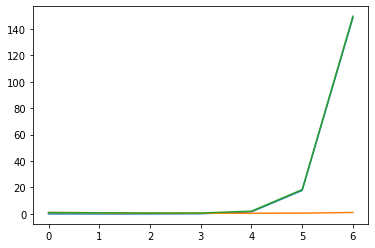

In [42]:
f = 1
f2 = 1
plt.plot(arr[:, 0]*f)
plt.plot(arr[:, 1]*f2)
plt.plot(arr[:, 1]*f2 + arr[:, 0]*f)

In [39]:
from MarinePredator.MPA import MPA

In [42]:
def fitness_func(wr, wg, wc, thres):
    pass

In [132]:
mpa = MPA.load_mpa(r"C:\Users\kshit\Downloads\3_channel_10.log")

In [133]:
ct = mpa.convergence_curve

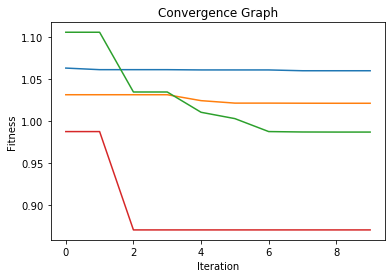

In [138]:
fig, ax = plt.subplots()

plt.title("Convergence Graph")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.plot(cnt, label="RGB")
plt.plot(ct, label="RGB+texture")
plt.plot(lnt, label="LAB")
plt.plot(lt, label="LAB+texture")
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()